# Continuous Uniform Distribution

---

## Import

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statistics
from scipy import stats

%matplotlib inline
plt.style.use("fivethirtyeight")

---

## Utilities

In [2]:
def get_bins(xmin, xmax, step = 1):
    bins = np.arange(xmin, xmax, step)
    bins = bins if len(bins) > 2 else get_bins(xmin, xmax + 1, step)
    return bins if len(bins) <= 100 \
        else get_bins(xmin, xmax, step = step + 1)

In [3]:
def get_continuous_ticks(xmin, xmax):
    cuts = [5, 10, 20, 50, 100, 200, 500, 1000]
    ticks = np.arange(int(np.floor(xmin)), int(np.ceil(xmax)) + 1)
    if len(ticks) > 15:
        for cut in cuts:
            ticks = [tick for tick in ticks if tick % cut == 0]
            if len(ticks) <= 15:
                return ticks
        return ticks
    return ticks

In [4]:
def plot_continuous_distribution(f, x_axis, obs = None, q = None, **kwargs):
    pdf = f.pdf(x_axis, **kwargs)
    
    fig, ax = plt.subplots(figsize = (8, 4))
    ax.plot(x_axis, pdf, alpha = 0.7, color = "k")
    ax.fill_between(x_axis, pdf, alpha = 0.4)
    
    print(f"Mean: {f.mean(**kwargs)}")
    print(f"Median: {f.median(**kwargs)}")
    print(f"Variance: {f.var(**kwargs)}")
    print(f"Standard Deviation: {f.std(**kwargs)}")
    
    plt.xticks(get_continuous_ticks(xmin = x_axis.min(), xmax = x_axis.max()))
    plt.show()

In [5]:
def sample_continuous_distribution(f, size = 1, seed = None, **kwargs):
    sample = f.rvs(size = size, random_state = seed, **kwargs)
    
    print(f"Min: {np.min(sample)}")
    print(f"Mean: {np.mean(sample)}")
    print(f"Median: {np.median(sample)}")
    print(f"Max: {np.max(sample)}")
    print(f"Variance: {np.var(sample, ddof = 0)}")
    print(f"Standard Deviation: {np.std(sample, ddof = 0)}")
    
    fig, ax = plt.subplots(figsize = (8, 4))
   
    plt.hist(x = sample,
             density = True,
             edgecolor = "k",
             bins = get_bins(sample.min(), sample.max() + 1),
             linewidth = 2)

    plt.xticks(get_continuous_ticks(sample.min(), sample.max()))
    plt.show()
    return sample

---

Nel caso continuo non si specifica il numero di *outcome* discreti possibili, bensì l'intervallo $[a,b]$ in cui la *random variable* ha valori.

La *PDF* può essere ricavata osservano come la distribuzione non sia altro che un rettangolo di base $b-a$ ed area totale unitaria, di conseguenza si ottiene la relazione $f(x)\cdot (b-a)=1$.

**PDF**:

$$\large f(x)=\begin{cases}
    \frac{1}{b-a}, & \text{if $a\leq x\leq b$}.\\
    0, & \text{otherwise}.
  \end{cases}$$

**Expectation** e **Variance**:

$$\large E(X)=\frac{a+b}{2}$$

$$\large Var(X)=\frac{(b-a)^2}{12}$$

Trattandosi di una distribuzione simmetrica, la media e la mediana coincidono! Quindi il valore della mediana è pari a $E(X)$.

---

#### Probability Density Function

Mean: 6.0
Median: 6.0
Variance: 8.333333333333332
Standard Deviation: 2.8867513459481287


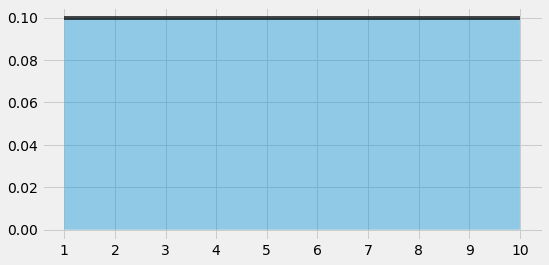

In [6]:
x_min = 1
x_max = 10

x_axis = np.linspace(x_min, x_max, 1000)

plot_continuous_distribution(f = stats.uniform,
                             x_axis = x_axis,
                             loc = x_min,
                             scale = x_max)

---

#### RVS

Min: 1.0120404335805901
Mean: 6.082036246603604
Median: 6.266702145242494
Max: 10.963969713537626
Variance: 8.399934133916895
Standard Deviation: 2.898263986236743


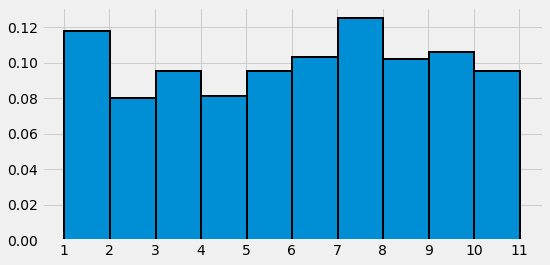

In [7]:
x_min = 1
x_max = 10

sample = sample_continuous_distribution(f = stats.uniform,
                                        size = 1000,
                                        loc = x_min,
                                        scale = x_max)

---